In [1]:
import pandas as pd
import numpy as np
#1-downloaded the dataset
#2-loaded the dataset

In [2]:
df=pd.read_csv('abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

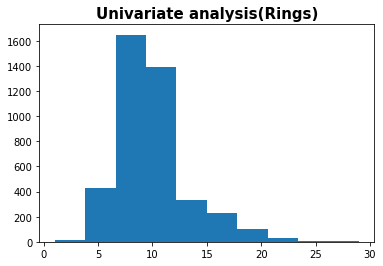

In [6]:
#3-performing visualizations
#3a-univariate analysis

plt.title("Univariate analysis(Rings)", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
plt.hist(df.Rings)

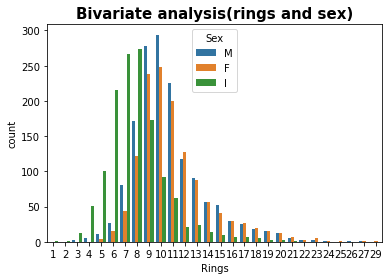

In [7]:
#3b-bivariate analysis
plt.title("Bivariate analysis(rings and sex)", fontsize=15, fontweight='bold', ha='center')
sns.countplot(x = "Rings", hue = 'Sex', data = df)

Multivariate Analysis


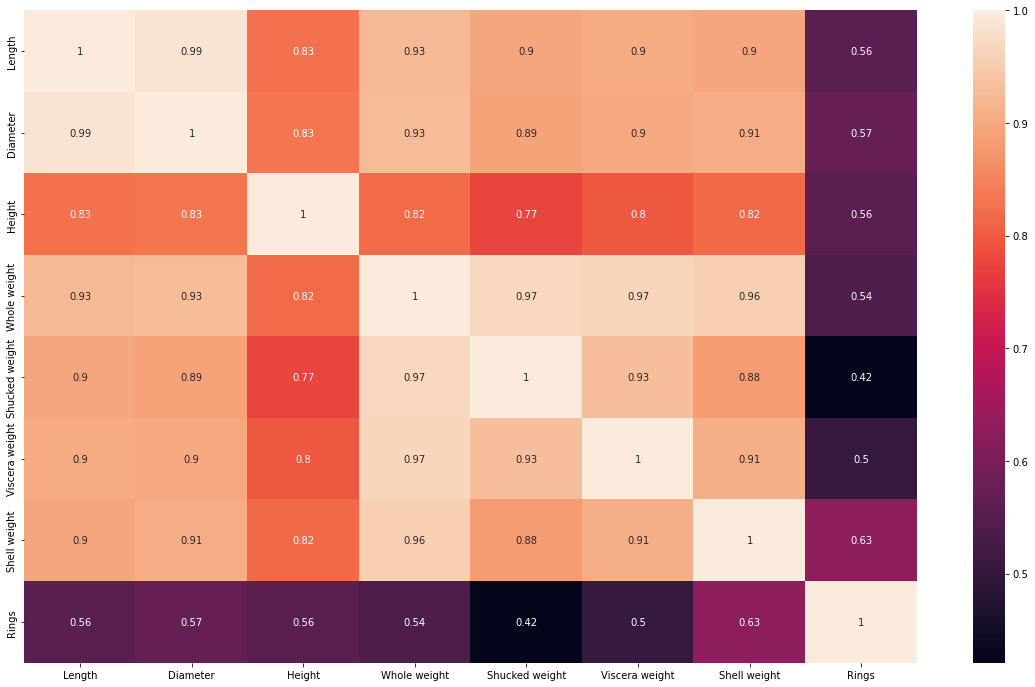

In [8]:
#3c-multivariate analysis
print("Multivariate Analysis")
corr = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(corr, annot = True)

In [9]:
#4-descriptive statistics
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
#5-handling missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [11]:
df.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


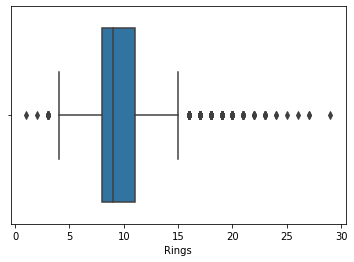

In [12]:
#6-handling outliers
#finding outliers
sns.boxplot(df.Rings)

In [13]:
 print(df['Rings'].quantile(0.10))
print(df['Rings'].quantile(0.90))

6.0
14.0


In [14]:
#handling outliers
df["Rings"] = np.where(df["Rings"] <5.0, 5.0,df['Rings'])
df["Rings"] = np.where(df["Rings"] > 15.0,15.0,df['Rings'])
print(df['Rings'].skew())

0.3495390929475056


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


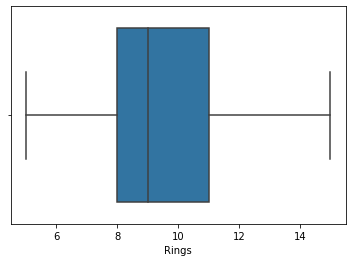

In [15]:
#after removing outliers
sns.boxplot(df.Rings)

In [16]:
#7-encoding categorical columns
from sklearn import preprocessing
cat_columns = [cname for cname in df.columns
                        if df[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])
    
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [17]:
#8-splitting dataset into dependent and independent variables
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
columns = [c for c in columns if c not in ['Rings']]
y = df['Rings'] 
X = df[columns]  

In [18]:
#9-scaling independent variables
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

In [19]:
x=df.drop(columns=['Rings'],axis=1)
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [20]:
y=df.Rings
y.head()

0    15.0
1     7.0
2     9.0
3    10.0
4     7.0
Name: Rings, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [22]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,1.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261
2,0.0,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773
3,1.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965
4,0.5,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313


In [23]:
#10 - splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [24]:
#11- Building a regression model
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()

In [25]:
MLR.fit(x_train,y_train)

LinearRegression()

In [26]:
#12- training the dataset
y_pred = MLR.predict(x_test)
y_pred = [round(item) for item in y_pred]

In [27]:
#13 Testing the dataset
pd.DataFrame({'Actual_y':y_test,'Predicted_y':y_pred})

,Actual_y,Predicted_y
668,13.0,12
1580,8.0,10
3784,11.0,11
463,5.0,6
2615,12.0,11
...,...,...
575,11.0,10
3231,12.0,9
1084,7.0,9
290,15.0,11


In [28]:
#14- Measuring performance using Metrics

In [29]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge = Ridge()
lasso = Lasso()

In [30]:
ridge.fit(x_train,y_train)

Ridge()

In [31]:
lasso.fit(x_train,y_train)

Lasso()

In [32]:
y_test_pred = ridge.predict(x_test)
y_test_pred = [round(item) for item in y_test_pred]

In [33]:
y_test_predl = lasso.predict(x_test)
y_test_predl = [round(item) for item in y_test_predl]

In [34]:
#14 - Evaluation metrics
from sklearn import metrics

In [35]:
#MSE
metrics.mean_squared_error(y_test,y_pred)

3.3636363636363638

In [36]:
#ridge mse
metrics.mean_squared_error(y_test,y_test_pred)

3.3696172248803826

In [37]:
#lasso mse
metrics.mean_squared_error(y_test,y_test_predl)

7.5227272727272725

In [38]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.834021909257456

In [39]:
#ridge rmse
np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

1.8356517166609745

In [40]:
# lasso rmse 
np.sqrt(metrics.mean_squared_error(y_test,y_test_predl))

2.742759062099198

In [41]:
#R2 Score
metrics.r2_score(y_test,y_pred)

0.545753574475362

In [42]:
# testing acc. of ridge
metrics.r2_score(y_test,y_test_pred) 

0.5449458816845998

In [43]:
# testing acc. of lasso
metrics.r2_score(y_test,y_test_predl) 

-0.015915992220643105